In [1]:
import os
os.chdir('/home/asajw/SETI/srcv2/')

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import torch
import vae

folder exists, make sure this call is from inference.py


/home/asajw/anaconda3/envs/dl/lib/python3.8/site-packages/pl_bolts/utils/warnings.py:30: UserWarning: You want to use `wandb` which is not installed yet, install it with `pip install wandb`.
  stdout_func(
/home/asajw/anaconda3/envs/dl/lib/python3.8/site-packages/pl_bolts/utils/warnings.py:30: UserWarning: You want to use `gym` which is not installed yet, install it with `pip install gym`.
  stdout_func(


In [3]:
from sklearn import metrics

import config
import dataset
import seedandlog
import os

from tqdm import tqdm
torch.multiprocessing.set_sharing_strategy('file_system')

seedandlog.seed_torch(seed=config.SEED)

data_path = config.DATA_PATH
device = config.DEVICE
bs = config.BATCH_SIZE
target_size = config.TARGET_SIZE

saved_model_name = config.SAVED_MODEL_NAME

In [4]:


model = vae.VAE()
model.to(device)
states = [torch.load(f'{config.MODEL_OUTPUT_PATH}loss_fold{fold}_{saved_model_name}.pth') for fold in range(1)]


 Using legacy_seresnet18 as backbone, backbone head: Linear(in_features=512, out_features=1000, bias=True)



In [5]:
config.CHANNELS

1

In [6]:
def get_test_file_path(image_id):
    if config.ORIG_IMAGE:
        return f"{data_path}train/{image_id[0]}/{image_id}.npy"
    else:
        return f"{config.NORM_IMAGE_PATH}train/{image_id}.npy__0.npy"

if config.DEBUG:
    inference_df = pd.read_csv(data_path+'train_labels.csv')[:10]
else:
    inference_df = pd.read_csv(data_path+'train_labels.csv')

inference_df['image_path'] = inference_df['id'].apply(get_test_file_path)
inference_df['orig_index'] = inference_df.index.values

In [7]:
inference_df

,id,target,image_path,orig_index
0,00034abb3629,0,/mnt/gfs/gv1/project_sonar_data/seti/normalize...,0
1,0004300a0b9b,0,/mnt/gfs/gv1/project_sonar_data/seti/normalize...,1
2,000453852fda,0,/mnt/gfs/gv1/project_sonar_data/seti/normalize...,2
3,00047dfc96a9,0,/mnt/gfs/gv1/project_sonar_data/seti/normalize...,3
4,0004be0baf70,0,/mnt/gfs/gv1/project_sonar_data/seti/normalize...,4
...,...,...,...,...
50160,fff395e32a1e,0,/mnt/gfs/gv1/project_sonar_data/seti/normalize...,50160
50161,fff66bbc51db,0,/mnt/gfs/gv1/project_sonar_data/seti/normalize...,50161
50162,fffaf1658eb7,0,/mnt/gfs/gv1/project_sonar_data/seti/normalize...,50162
50163,fffb0fc8c613,0,/mnt/gfs/gv1/project_sonar_data/seti/normalize...,50163


In [8]:
inputs = dataset.SetiDataset(df=inference_df, augmentations=False)

model.load_state_dict(states[0]['model']) 


<All keys matched successfully>

con 1.1353265882974029e-08 0.9999947547912598
0.0 0.99999994


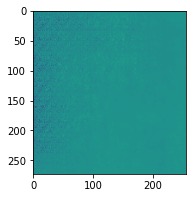

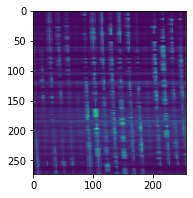

In [9]:
recon_x, x, mu, log_var, z = model(inputs[np.random.choice(np.arange(345))]['images'].view(-1,1,273,256).to('cuda'))
recon_x = np.array(recon_x.cpu().detach().numpy())
x = np.array(x.cpu().detach().numpy())

plt.figure(figsize=(3,3))
plt.imshow(recon_x.reshape(273, 256))
plt.figure(figsize=(3,3))
plt.imshow(x.reshape(273, 256))
print(f'con {recon_x.mean()} {recon_x.std()}')
print(x.mean(), x.std())

In [10]:
a=[1,2]
a.reverse()
a

[2, 1]

In [11]:
saved_model_name

'SeResNet_legacy_seresnet18_bs32_Chl0_256273_mixupFalse_augSwapDropFlip_ups0_scdCosineAnnealingWarmRestarts_dropoutFalse_InvOrigNorm_epoch150'